In [1]:
#Imports
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def load_csv(filename):
    valores = read_csv (filename, header=None).to_numpy()
    return valores.astype(float)

In [3]:
def h(x, theta):
    return theta[0] + theta[1] * x

In [4]:
def cost_function(X, Y, theta):
    observed = h(X, theta)
    return func_coste(Y, observed)

In [5]:
def func_coste(expected, observed):
    dif = (1/(2*len(expected)))*np.sum(np.subtract(expected, observed)**2)
    return dif

In [6]:
def lineal_regresion_one_variable():
    data = load_csv('ex1data1.csv')
    
    #Primera Columna
    X = data[:,0]
    #Segunda Columna
    Y = data[:,1]
    
    # Numero de ejemplos de entrenamiento
    m = len(X)
    #Tamanho inicial de los saltos
    alpha = 0.01
    #Inicializacion de los valores de theta0 y theta1
    theta0 = theta1 = 0
    
    #Codigo del profesor
    #for _ in range(1500):
    #    sum_0 = sum_1 = 0
    #    for i in range(m):
    #        sum_0 += (theta0 + theta1 * X[i]) - Y[i]
    #        sum_1 += ((theta0 + theta1 * X[i]) - Y[i]) * X[i]
    #    theta0 = theta0 - (alpha/m) * sum_0
    #    theta1 = theta1 - (alpha/m) * sum_1
    coste = list()
    for i in range(1500):
        observed = h(X, [theta0, theta1])
        theta0 = theta0 - (alpha/m) * np.sum(observed - Y)
        theta1 = theta1 - (alpha/m) * np.sum((observed - Y) * X)
        coste.append(cost_function(X, Y, [theta0, theta1]))
        
    #plt.plot(X, Y, "x")
    min_x = min(X)
    max_x = max(X)
    min_y = theta0 + theta1 * min_x
    max_y = theta0 + theta1 * max_x
    #plt.plot([min_x, max_x], [min_y, max_y], color='red', linewidth=2)
    
    #print(coste)
    #plt.plot(coste)
    #plt.xlabel('Iteraciones'); plt.ylabel("J($\\theta_{0}$,$\\theta_{1}$)")
    #plt.savefig("resultCoste.png")
    #plt.show
    
    #plt.plot(coste)
    #plt.show
    return [theta0, theta1, coste]
    

In [7]:
l = lineal_regresion_one_variable()
l[0] + l[1]*7

4.534245012944714

In [8]:
def make_data(t0_range, t1_range, X, Y, step=0.1):
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
     # Theta0 y Theta1 tienen las misma dimensiones, de forma que
     # cogiendo un elemento de cada uno se generan las coordenadas x,y
     # de todos los puntos de la rejilla
    Coste = np.empty_like(Theta0)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = cost_function(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
    
    #print(Coste)    
    return [Theta0, Theta1, Coste]

In [9]:
def show_contour(data, thetas):
    plt.contour(data[0],data[1],data[2],np.logspace(-2,3,20))
    #plt.plot(dataPoint)
    plt.plot(thetas[0], thetas[1],'rx');
    plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
    #plt.contour(data[0],data[1],data[2])
    plt.savefig("part1_contour.png")

In [10]:
def show_mesh(data):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(data[0], data[1], data[2], cmap=cm.jet, linewidth=0, antialiased=False)
    
    plt.show()
    fig.savefig("part1_mesh.png")

In [11]:
def print_graphs():
    data = load_csv('ex1data1.csv')
    X = data[:, 0]
    Y = data[:, 1]
    grid_data = make_data([-10, 10], [-1, 4], X, Y)
    
    dataPoint = lineal_regresion_one_variable()
    show_contour(grid_data, dataPoint)
    show_mesh(grid_data)

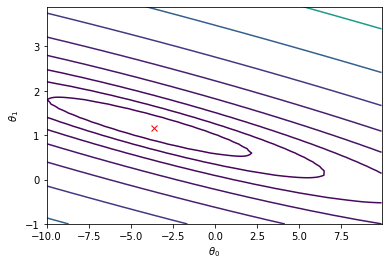

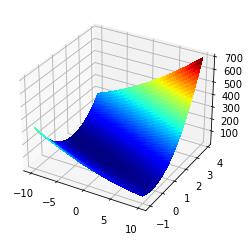

In [12]:
print_graphs()

## Parte 2

In [19]:
def h_vec(x, theta):
    return np.dot(x, theta)

[340412.65957003 109446.84000912  -6577.39839364]


293081.67470441805

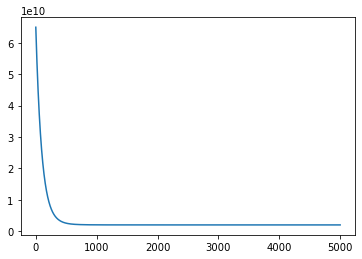

In [20]:
datos = load_csv('ex1data2.csv')
X = datos[:, :-1]
np.shape(X)         # (97, 1)
Y = datos[:, -1]
np.shape(Y)         # (97,)
m = np.shape(X)[0]
n = np.shape(X)[1]
# añadimos una columna de 1's a la X
Means = list()
Std = list()
for i in range(n):
    Means.append(np.mean(X[:,i]))
    Std.append(np.std(X[:,i]))
    X[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])

X = np.hstack([np.ones([m, 1]), X])
#Y = (Y-np.mean(Y))/np.std(Y)
alpha = 0.005
Thetas, costes = descenso_gradiente(X, Y, alpha)
print(Thetas)

h_vec([1,(1650-Means[0])/Std[0] ,(3-Means[1])/Std[1]], Thetas)


In [21]:
datos = load_csv('ex1data2.csv')
X = datos[:, :-1]
np.shape(X)         # (97, 1)
Y = datos[:, -1]
np.shape(Y)         # (97,)
m = np.shape(X)[0]
n = np.shape(X)[1]
# añadimos una columna de 1's a la X


#for i in range(len(X[0])):
 #   X[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])

#Y = (Y-np.mean(Y))/np.std(Y)
X = np.hstack([np.ones([m, 1]), X])

func_transpose(X,Y)

h_vec([1,1650,3], func_transpose(X,Y))

293081.4643349892

In [22]:
def func_transpose(X, Y):
    #Realizamos la traspuesta Xt
    transpuesta_x = np.transpose(X)
    #Psudo inversa de una matriz (XtX)^-1
    inverse_matrix = np.linalg.pinv(np.dot(transpuesta_x, X))
    #(XtX)^-1 Xt
    second_mul = np.dot(inverse_matrix, transpuesta_x)
    #(XtX)^-1 Xt Y
    y_mul = np.dot(second_mul, Y)
    
    return y_mul


In [23]:
def coste(X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))

In [24]:
def descenso_gradiente(X, Y, alpha):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    thetas = np.zeros(n)
    costes = list()
    for i in range(5000):
        #NuevaTheta = thetas
        Aux = (h_vec(X, thetas) - Y)
        #for i in range(n):
         #   Aux_i = np.sum(Aux * X[:, i])
         #   NuevaTheta -= (alpha / m) * Aux_i
        sum_x = np.dot(Aux, X)
        thetas -= (alpha / m) * sum_x   
        #thetas = NuevaTheta
        #sum_x = list()
        
        #Aux = (h_vec(X, thetas) - Y)
        #print(Aux)
        #for j in range(len(X[0])):
         #   sum_x.append(np.sum(Aux * X[:,j]))
            
        #sum_x = (alpha/m)*np.array(sum_x)
        #thetas = np.subtract(thetas, sum_x)
        costes.append(coste(X, Y, thetas))
        
    plt.plot(costes)
    plt.show
    
    return thetas, costes

In [25]:
def lineal_regresion_multiple_variable():
    data = load_csv('ex1data1.csv')
    
    #Primera Columna
    X = data[:,0]
    #Segunda Columna
    Y = data[:,1]
    
    # Numero de ejemplos de entrenamiento
    m = len(X)
    #Tamanho inicial de los saltos
    alpha = 0.01
    #Inicializacion de los valores de theta0 y theta1
    theta0 = theta1 = 0

    
    
    #plt.plot(coste)
    #plt.show
    return [theta0, theta1, coste]

In [26]:
from sklearn.preprocessing import StandardScaler

# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(X)
airbnb_data_scaled=scaler_x.transform(X)

airbnb_data_scaled

array([[ 0.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 0.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 0.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 0.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 0.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 0.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 0.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 0.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 0.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 0.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 0.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 0.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 0.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 0.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 0.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 0.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 0.00000000e+00, -8.65782986e-01